# Customer Segmentation 

Utilize RFM analysis and clustering on E-Commerce Dataset. 
Dataset pulled from: https://archive.ics.uci.edu/ml/datasets/online+retail

**Content**
1. [Creating the RFM Dataset](#creation)
2. [Visualizing RFM Data](#visual)
3. Clustering:
    * [K-Means](#kmeans)
    * [Hierarchical Clustering](#hc)
    * [Gaussian Mixture Models](#gmm)
    
    
**Summary**

Of the three clustering methods I used, Gaussian Mixture Models seem to work the best. The clusters chosen were of relatively decent sizes, and the distributions within the clusters look good too. Upon visual inspection the clusters also make sense.

The Gaussian Mixture Models method provided us with four clusters that categorized clients as follows:
* Cluster 0: Clients who have not really purchased items recently, and are unlikely to return.  
* Cluster 1: High value clients who purchased items frequently, with high monetary value.
* Cluster 2: Somewhat valuable clients who purchase items with some frequency, and make big purchases.
* Cluster 3: Moderately valued clients.


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data.csv", parse_dates= ['InvoiceDate'])
df.columns = df.columns.str.lower()
df['date'] = df['invoicedate'].dt.date

df.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01


## <a name="creation"></a> Creating RFM data

First we need to analyze the data set to check for nulls and negative values. Then we will create the recency (R), frequency (F), and monetary (M) calculations. RFM is defined as follows:
- Recency: When did a client last purchase?
- Frequency: How often did a client purchase?
- Monetary: How much did a client pruchase?

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   invoiceno    541909 non-null  object        
 1   stockcode    541909 non-null  object        
 2   description  540455 non-null  object        
 3   quantity     541909 non-null  int64         
 4   invoicedate  541909 non-null  datetime64[ns]
 5   unitprice    541909 non-null  float64       
 6   customerid   406829 non-null  float64       
 7   country      541909 non-null  object        
 8   date         541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 37.2+ MB


In [4]:
# we notice that the min value for quantity and unitprice is <0
df[['quantity', 'unitprice']].describe()

,quantity,unitprice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


In [5]:
df[df['customerid'].isnull()]

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,date
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom,2010-12-01
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom,2010-12-01
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom,2010-12-01
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom,2010-12-01
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom,2010-12-01
...,...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom,2011-12-09
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom,2011-12-09
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom,2011-12-09
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom,2011-12-09


In [6]:
# We notice that there are negative values for quantity
#df[(df['quantity'] < 0 ) & (df['stockcode'] == '23169')]
df[(df['invoiceno'].str.slice(0, 1) != 'C') & (df['quantity'] < 0) ]

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,date
2406,536589,21777,NaN,-10,2010-12-01 16:50:00,0.0,NaN,United Kingdom,2010-12-01
4347,536764,84952C,NaN,-38,2010-12-02 14:42:00,0.0,NaN,United Kingdom,2010-12-02
7188,536996,22712,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom,2010-12-03
7189,536997,22028,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom,2010-12-03
7190,536998,85067,NaN,-6,2010-12-03 15:30:00,0.0,NaN,United Kingdom,2010-12-03
...,...,...,...,...,...,...,...,...,...
535333,581210,23395,check,-26,2011-12-07 18:36:00,0.0,NaN,United Kingdom,2011-12-07
535335,581212,22578,lost,-1050,2011-12-07 18:38:00,0.0,NaN,United Kingdom,2011-12-07
535336,581213,22576,check,-30,2011-12-07 18:38:00,0.0,NaN,United Kingdom,2011-12-07
536908,581226,23090,missing,-338,2011-12-08 09:56:00,0.0,NaN,United Kingdom,2011-12-08


In [7]:
df[(df['stockcode'] == '35004C') ].sort_values(by = 'date')

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,date
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,2010-12-01
200,536389,35004C,SET OF 3 COLOURED FLYING DUCKS,6,2010-12-01 10:03:00,5.45,12431.0,Australia,2010-12-01
297,536397,35004C,SET OF 3 COLOURED FLYING DUCKS,48,2010-12-01 10:51:00,4.65,17924.0,United Kingdom,2010-12-01
2316,536576,35004C,SET OF 3 COLOURED FLYING DUCKS,120,2010-12-01 16:11:00,4.65,13777.0,United Kingdom,2010-12-01
3933,536739,35004C,SET OF 3 COLOURED FLYING DUCKS,3,2010-12-02 13:08:00,5.45,14180.0,United Kingdom,2010-12-02
6544,536947,35004C,SET OF 3 COLOURED FLYING DUCKS,3,2010-12-03 12:29:00,5.45,13013.0,United Kingdom,2010-12-03
7417,537036,35004C,SET OF 3 COLOURED FLYING DUCKS,1,2010-12-03 17:28:00,5.45,15545.0,United Kingdom,2010-12-03
9200,537195,35004C,SET OF 3 COLOURED FLYING DUCKS,12,2010-12-05 13:55:00,4.65,15311.0,United Kingdom,2010-12-05
17311,537700,35004C,SET OF 3 COLOURED FLYING DUCKS,48,2010-12-08 10:51:00,4.65,18229.0,United Kingdom,2010-12-08
17451,537762,35004C,SET OF 3 COLOURED FLYING DUCKS,3,2010-12-08 12:01:00,5.45,16558.0,United Kingdom,2010-12-08


Now we filter the dataset and calculate amounts.

In [8]:
df = df.dropna()
df = df[df['quantity'] > 0]

df['amt'] = df['quantity'] * df['unitprice']
df[['amt',
    'quantity', 
    'unitprice'
]].describe()

,amt,quantity,unitprice
count,397924.000000,397924.000000,397924.000000
mean,22.394749,13.021823,3.116174
std,309.055588,180.420210,22.096788
min,0.000000,1.000000,0.000000
25%,4.680000,2.000000,1.250000
50%,11.800000,6.000000,1.950000
75%,19.800000,12.000000,3.750000
max,168469.600000,80995.000000,8142.750000


In [9]:
df_group = df[['invoiceno', 'stockcode', 'quantity', 'unitprice', 'amt', 'customerid', 'country', 'date']]
df_group = df_group.groupby(['customerid', 'country', 'date', 'invoiceno']).agg({
        'amt' : ['sum'],
    'stockcode':['count'],
    'quantity' : ['count']

}).reset_index()
    

df_group['total_amount'] = df_group[('amt', 'sum')]
df_group['num_product_types_purchased'] = df_group[('stockcode', 'count')]
df_group['num_product_quantity_purchased'] = df_group[('quantity', 'count')]
df_group = df_group[['customerid', 'country', 'date', 'invoiceno', 'total_amount', 'num_product_types_purchased', 
         'num_product_quantity_purchased']]


In [10]:
df_group[['customerid', 'country']].groupby(['customerid']).agg({
    'country':['nunique']
}).reset_index().sort_values(by=[('country', 'nunique')])

,customerid,country
,,nunique
0,12346.0,1
2884,16274.0,1
2885,16275.0,1
2886,16276.0,1
2887,16278.0,1
...,...,...
60,12422.0,2
56,12417.0,2
92,12457.0,2


In [11]:
# Let's just look at what these countries look like
df_group[df_group['customerid'].isin({12417, 12422, 12394, 12429 }) ]

,customerid,country,date,invoiceno,total_amount,num_product_types_purchased,num_product_quantity_purchased
,,,,,,,
106,12394.0,Belgium,2011-05-06,552188,381.08,21,21
107,12394.0,Denmark,2011-10-07,569997,891.40,6,6
178,12417.0,Belgium,2010-12-17,539391,291.34,11,11
179,12417.0,Belgium,2011-01-25,541991,323.44,16,16
180,12417.0,Belgium,2011-03-03,545536,410.00,19,19
181,12417.0,Belgium,2011-06-05,555574,437.19,23,23
182,12417.0,Belgium,2011-08-04,562445,355.56,21,21
183,12417.0,Belgium,2011-08-25,564378,562.69,35,35
184,12417.0,Belgium,2011-10-31,573656,462.85,24,24


In [12]:
# for now just going to ignore the country stuff
df_group = df_group.groupby(['customerid']).agg({
    'date':['count', 'max'],
    'invoiceno': ['nunique'],
    'total_amount' : ['sum', 'mean'],
    'num_product_types_purchased': ['sum', 'mean'],
    'num_product_quantity_purchased': ['sum', 'mean']
}).reset_index()
df_group.head(5)

customerid  date             invoiceno total_amount                \
             count         max   nunique          sum          mean   
0    12346.0     1  2011-01-18         1     77183.60  77183.600000   
1    12347.0     7  2011-12-07         7      4310.00    615.714286   
2    12348.0     4  2011-09-25         4      1797.24    449.310000   
3    12349.0     1  2011-11-21         1      1757.55   1757.550000   
4    12350.0     1  2011-02-02         1       334.40    334.400000   

  num_product_types_purchased        num_product_quantity_purchased         
                          sum   mean                            sum   mean  
0                           1   1.00                              1   1.00  
1                         182  26.00                            182  26.00  
2                          31   7.75                             31   7.75  
3                          73  73.00                             73  73.00  
4                          17  17.00                             17  17.00

In [13]:
# Now we can create the RFM dataset
df_group['frequency'] = df_group[('date', 'count')]
df_group['recency'] = (df_group[('date', 'max')].max() - df_group[('date', 'max')]).dt.days
df_group['monetary_all'] = df_group[('total_amount', 'sum')]
df_group['monetary_mean'] = df_group[('total_amount', 'mean')]

rfm = df_group[['customerid',  'recency', 'frequency', 'monetary_all', 'monetary_mean']]
rfm.set_index('customerid', inplace=True)
rfm.head()

,recency,frequency,monetary_all,monetary_mean
,,,,
customerid,,,,
12346.0,325,1,77183.60,77183.600000
12347.0,2,7,4310.00,615.714286
12348.0,75,4,1797.24,449.310000
12349.0,18,1,1757.55,1757.550000
12350.0,310,1,334.40,334.400000


In [14]:
# Observe the correlations
rfm.corr()

,,recency,frequency,monetary_all,monetary_mean
,,,,,
recency,,1.000000,-0.260459,-0.122190,-0.000349
frequency,,-0.260459,1.000000,0.554094,0.019052
monetary_all,,-0.122190,0.554094,1.000000,0.393286
monetary_mean,,-0.000349,0.019052,0.393286,1.000000


## <a name="visual"></a> Visualize the RFM Dataset

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

C:\Users\adelynyeoh\Anaconda3\envs\working_python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\adelynyeoh\Anaconda3\envs\working_python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\adelynyeoh\Anaconda3\envs\working_python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a

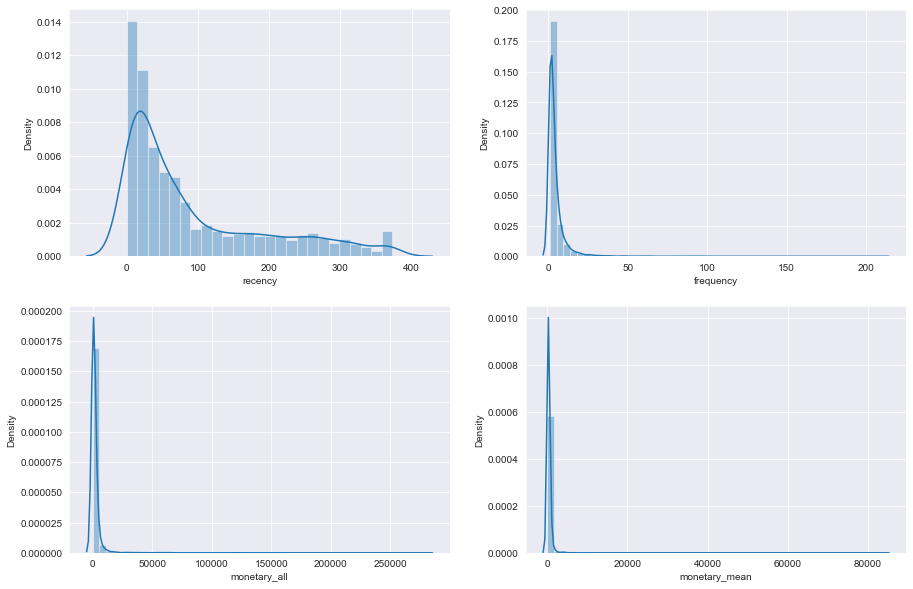

In [16]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
plot_recency = sns.distplot(rfm['recency'], ax=ax1)
plot_frequency = sns.distplot(rfm['frequency'], ax=ax2)
plot_monetary = sns.distplot(rfm['monetary_all'], ax=ax3)
plot_monetary = sns.distplot(rfm['monetary_mean'], ax=ax4)

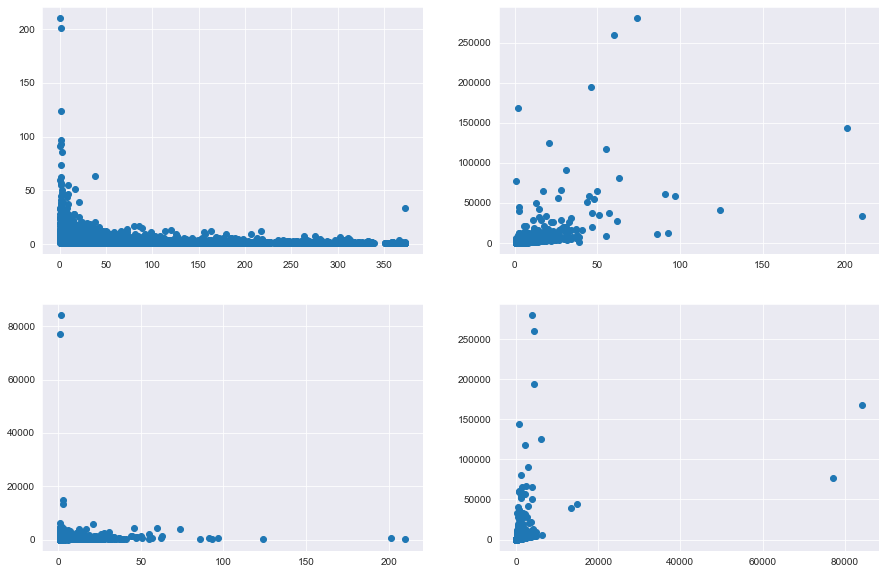

In [17]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

ax1.scatter(rfm['recency'], rfm['frequency'])
ax2.scatter(rfm['frequency'], rfm['monetary_all'])
ax3.scatter(rfm['frequency'], rfm['monetary_mean'])
ax4.scatter(rfm['monetary_mean'], rfm['monetary_all'])


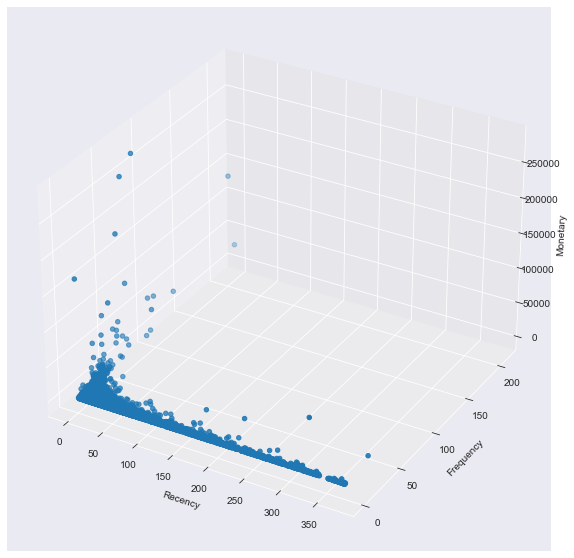

In [18]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection = '3d')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.scatter(rfm['recency'], rfm['frequency'], rfm['monetary_all'])

plt.show()

## <a name="kmeans"></a> KMeans Clustering

First we use the Elbow Method to determine the number of clusters for KMeans. 

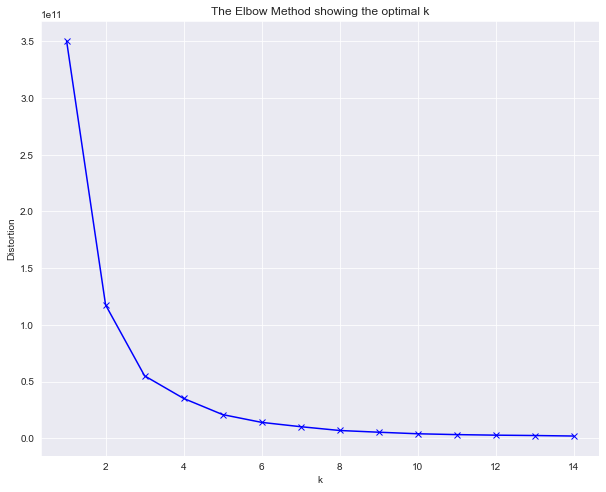

In [19]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA

krange = [x for x in range(1, 15)]
distortions = []

X=rfm[['recency', 'frequency', 'monetary_all']]

for k in krange:
    kmeans_model = KMeans(n_clusters=k).fit(X)
    kmeans_model.fit(X)
    #distortions.append(sum(np.min(cdist(X, kmeans_model.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    distortions.append(kmeans_model.inertia_)
    
fig, ax = plt.subplots(1, 1, figsize=(10,8))
plt.plot(krange, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()
    

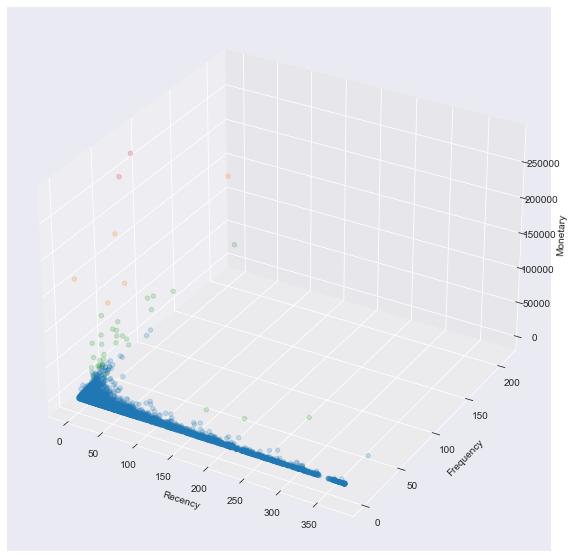

In [20]:
X=rfm[['recency', 'frequency', 'monetary_all']]
num_clusters = 4

kmeans_model = KMeans(n_clusters=num_clusters).fit(X)
out = kmeans_model.fit(X)
X['cluster'] = out.labels_

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection = '3d')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

for x in range(0, num_clusters):
    hold_x = X[X['cluster'] == x]
    ax.scatter(hold_x['recency'], hold_x['frequency'], hold_x['monetary_all'], alpha = 0.2 )
    
plt.show()
    

In [21]:
X.reset_index().groupby(['cluster']).agg({
    'customerid' : ['count'],
    'recency' : ['mean', 'std'],
    'frequency':['mean', 'std'],
    'monetary_all':['mean', 'std']
    
})

customerid    recency              frequency             \
             count       mean         std       mean        std   
cluster                                                           
0             4301  92.628226  100.051755   3.894443   4.977299   
1                5   8.400000    9.607289  65.000000  78.838442   
2               31  30.032258   75.148956  42.806452  42.081999   
3                2   0.500000    0.707107  67.000000   9.899495   

          monetary_all                
                  mean           std  
cluster                               
0          1437.855997   2227.271055  
1        149828.502000  31848.698231  
2         46393.013871  17870.591823  
3        269931.660000  14530.139257

We used the elbow method to generate groups but we see that the distribution of groups is fairly lopsided. Not fairly useful in our segmenatation.

## <a name="hc"></a> Hierarchical Clustering

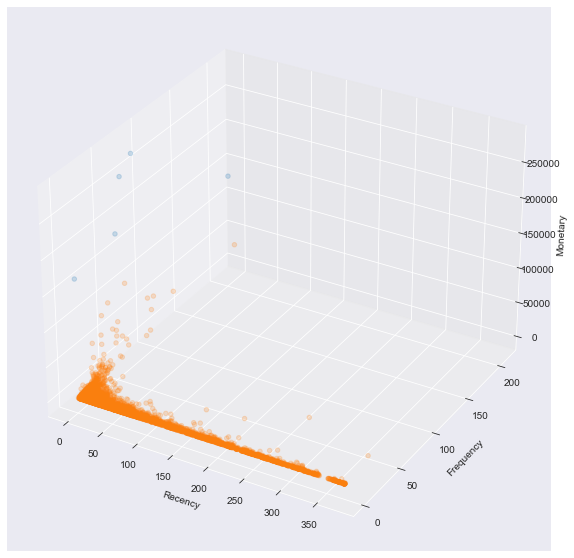

In [22]:
from sklearn.cluster import AgglomerativeClustering

X=rfm[['recency', 'frequency', 'monetary_all']]

ac_model = AgglomerativeClustering(linkage='complete')

X['cluster'] = ac_model.fit(X).labels_


fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection = '3d')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

for x in range(0, len(X['cluster'].unique())):
    hold_x = X[X['cluster'] == x]
    ax.scatter(hold_x['recency'], hold_x['frequency'], hold_x['monetary_all'], alpha = 0.2 )
    
plt.show()


In [23]:
X.reset_index().groupby(['cluster']).agg({
    'customerid' : ['count'],
    'recency' : ['mean', 'std'],
    'frequency':['mean', 'std'],
    'monetary_all':['mean', 'std']
    
})

customerid    recency              frequency             \
             count       mean         std       mean        std   
cluster                                                           
0                5   2.000000    3.391165  76.600000  74.597587   
1             4334  92.145362  100.018577   4.188509   6.947115   

          monetary_all                
                  mean           std  
cluster                               
0        209342.334000  58598.003581  
1          1814.650723   5298.291862

Similar to our K-Means approach, this clustering method yielded two few clusters, and the clustering is not particularly meaningful.

## <a name="gm"></a> Gaussian Mixture Model Clustering

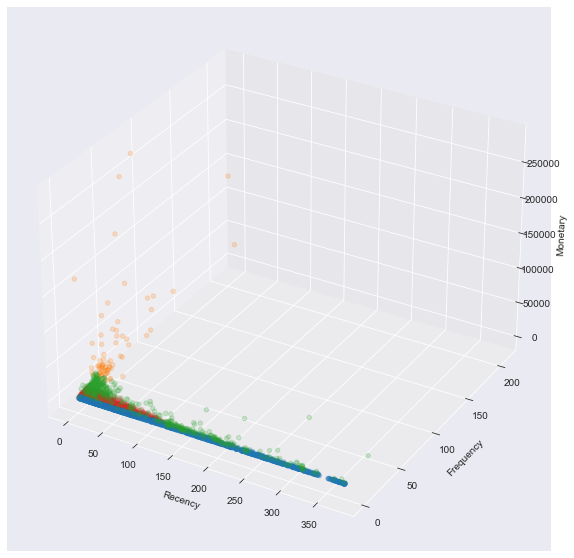

In [24]:
from sklearn.mixture import GaussianMixture

X=rfm[['recency', 'frequency', 'monetary_all']]

num_clusters = 4
gm = GaussianMixture(n_components=num_clusters, random_state=0).fit(X)
gm.fit(X)

X['cluster'] = gm.predict(X)


fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection = '3d')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

for x in range(0, num_clusters):
    hold_x = X[X['cluster'] == x]
    ax.scatter(hold_x['recency'], hold_x['frequency'], hold_x['monetary_all'], alpha = 0.2 )
    
plt.show()
    

In [25]:
X.reset_index().groupby(['cluster']).agg({
    'customerid' : ['count'],
    'recency' : ['mean', 'std'],
    'frequency':['mean', 'std'],
    'monetary_all':['mean', 'std']
    
})

customerid     recency              frequency             \
             count        mean         std       mean        std   
cluster                                                            
0             2232  139.423387  109.799669   1.433244   0.606277   
1               75    5.493333    6.930881  42.226667  34.381238   
2              443   84.241535   94.260364   9.659142   6.651222   
3             1589   31.745752   27.288473   4.966016   2.518216   

         monetary_all                
                 mean           std  
cluster                              
0          368.798195    236.255845  
1        40483.188533  53631.578809  
2         5309.169325   5609.653326  
3         1699.212826    999.033279

This particular segmentation makes sense. After several trials, I landed on selecting four clusters. The clusters have good sizes, and the distributions for each cluster makes sense.

From the data we can see that:
* Cluster 0: Clients who have not really purchased items recently, and are unlikely to return.  
* Cluster 1: High value clients who purchased items frequently, with high monetary value.
* Cluster 2: Somewhat valuable clients who purchase items with some frequency, and make big purchases.
* Cluster 3: Moderately valued clients.